In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Movies=pd.read_csv('movies.csv')
Crew=pd.read_csv('crew.csv')

In [3]:
Movies.head()

,movie_id,title,original_language,release_date,budget,revenue,runtime,vote_average,vote_count,popularity,genres,keywords,production_companies,production_countries
0,19995,Avatar,en,2009-12-10,237000000,2.787965e+09,162.0,7.2,11800,150.437577,Action|Adventure|Fantasy|Science Fiction,culture clash|future|space war|space colony|so...,Ingenious Film Partners|Twentieth Century Fox ...,United States of America|United Kingdom
1,285,Pirates of the Caribbean: At World's End,en,2007-05-19,300000000,9.610000e+08,169.0,6.9,4500,139.082615,Adventure|Fantasy|Action,ocean|drug abuse|exotic island|east india trad...,Walt Disney Pictures|Jerry Bruckheimer Films|S...,United States of America
2,206647,Spectre,en,2015-10-26,245000000,8.806746e+08,148.0,6.3,4466,107.376788,Action|Adventure|Crime,spy|based on novel|secret agent|sequel|mi6|bri...,Columbia Pictures|Danjaq|B24,United Kingdom|United States of America
3,49026,The Dark Knight Rises,en,2012-07-16,250000000,1.084939e+09,165.0,7.6,9106,112.312950,Action|Crime|Drama|Thriller,dc comics|crime fighter|terrorist|secret ident...,Legendary Pictures|Warner Bros.|DC Entertainme...,United States of America
4,49529,John Carter,en,2012-03-07,260000000,2.841391e+08,132.0,6.1,2124,43.926995,Action|Adventure|Science Fiction,based on novel|mars|medallion|space travel|pri...,Walt Disney Pictures,United States of America


In [4]:
len(Movies)

4795

In [5]:
Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4795 entries, 0 to 4794
Data columns (total 14 columns):
movie_id                4795 non-null int64
title                   4795 non-null object
original_language       4795 non-null object
release_date            4794 non-null object
budget                  4795 non-null int64
revenue                 4795 non-null float64
runtime                 4793 non-null float64
vote_average            4795 non-null float64
vote_count              4795 non-null int64
popularity              4795 non-null float64
genres                  4767 non-null object
keywords                4386 non-null object
production_companies    4450 non-null object
production_countries    4624 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 524.5+ KB


In [6]:
Movies.describe()

,movie_id,budget,revenue,runtime,vote_average,vote_count,popularity
count,4795.000000,4.795000e+03,4.795000e+03,4793.000000,4795.000000,4795.000000,4795.000000
mean,57051.887800,2.909267e+07,8.239771e+07,106.915084,6.093306,691.360792,21.527415
std,88593.489117,4.073962e+07,1.629583e+08,22.570343,1.190313,1235.298140,31.831547
min,5.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,9010.500000,8.000000e+05,0.000000e+00,94.000000,5.600000,54.000000,4.723880
50%,14585.000000,1.500000e+07,1.925587e+07,104.000000,6.200000,236.000000,12.963328
75%,58533.000000,4.000000e+07,9.311911e+07,118.000000,6.800000,738.000000,28.352222
max,459488.000000,3.800000e+08,2.787965e+09,338.000000,10.000000,13752.000000,875.581305


In [7]:
Movies.isnull().sum()

movie_id                  0
title                     0
original_language         0
release_date              1
budget                    0
revenue                   0
runtime                   2
vote_average              0
vote_count                0
popularity                0
genres                   28
keywords                409
production_companies    345
production_countries    171
dtype: int64

In [8]:
Movies['runtime'].fillna(Movies['runtime'].mean(),inplace=True)

In [9]:
Movies['release_date'].fillna(method='ffill',inplace=True)

In [10]:
Movies.isnull().sum()

movie_id                  0
title                     0
original_language         0
release_date              0
budget                    0
revenue                   0
runtime                   0
vote_average              0
vote_count                0
popularity                0
genres                   28
keywords                409
production_companies    345
production_countries    171
dtype: int64

In [11]:
Movies.dropna(inplace=True)
Movies.isnull().sum()

movie_id                0
title                   0
original_language       0
release_date            0
budget                  0
revenue                 0
runtime                 0
vote_average            0
vote_count              0
popularity              0
genres                  0
keywords                0
production_companies    0
production_countries    0
dtype: int64

In [12]:
all_genres=[]
for x in Movies.genres:
    all_genres.extend(x.split("|"))
all_geners=np.unique(all_genres)
print(all_geners)

['Action' 'Adventure' 'Animation' 'Comedy' 'Crime' 'Documentary' 'Drama'
 'Family' 'Fantasy' 'Foreign' 'History' 'Horror' 'Music' 'Mystery'
 'Romance' 'Science Fiction' 'TV Movie' 'Thriller' 'War' 'Western']


In [13]:
Genres=pd.DataFrame(data=np.zeros((len(Movies),len(all_geners))),columns=all_geners)

In [14]:
for i ,x in enumerate(Movies.genres):
    genres_of_one_example=Genres.columns.get_indexer(x.split('|'))
    Genres.iloc[i,genres_of_one_example]=1

In [15]:
all_Language=[]
for x in Movies.original_language:
    all_Language.extend(x.split("|"))
all_Language=np.unique(all_Language)
print(all_Language)

['af' 'ar' 'cn' 'da' 'de' 'el' 'en' 'es' 'fa' 'fr' 'he' 'hi' 'id' 'is'
 'it' 'ja' 'ko' 'ky' 'nb' 'nl' 'no' 'pl' 'ps' 'pt' 'ro' 'ru' 'sl' 'sv'
 'ta' 'te' 'th' 'tr' 'xx' 'zh']


In [16]:
Languages=pd.DataFrame(data=np.zeros((len(Movies),len(all_Language))),columns=all_Language)

In [17]:
for i ,x in enumerate(Movies.original_language):
    Language_of_one_example=Languages.columns.get_indexer(x.split('|'))
    Languages.iloc[i,Language_of_one_example]=1

In [18]:
all_production_countries=[]
for x in Movies.production_countries:
    all_production_countries.extend(x.split("|"))
all_production_countries=np.unique(all_production_countries)
print(all_production_countries)

['Afghanistan' 'Angola' 'Argentina' 'Aruba' 'Australia' 'Austria'
 'Bahamas' 'Belgium' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Brazil'
 'Bulgaria' 'Cambodia' 'Cameroon' 'Canada' 'Chile' 'China' 'Colombia'
 'Cyprus' 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'Egypt' 'Fiji'
 'Finland' 'France' 'Germany' 'Greece' 'Guadaloupe' 'Hong Kong' 'Hungary'
 'Iceland' 'India' 'Indonesia' 'Iran' 'Ireland' 'Israel' 'Italy' 'Jamaica'
 'Japan' 'Jordan' 'Kazakhstan' 'Kyrgyz Republic' 'Lebanon'
 'Libyan Arab Jamahiriya' 'Lithuania' 'Luxembourg' 'Malaysia' 'Malta'
 'Mexico' 'Monaco' 'Morocco' 'Netherlands' 'New Zealand' 'Norway'
 'Pakistan' 'Peru' 'Philippines' 'Poland' 'Portugal' 'Romania' 'Russia'
 'Serbia' 'Serbia and Montenegro' 'Singapore' 'Slovakia' 'Slovenia'
 'South Africa' 'South Korea' 'Spain' 'Sweden' 'Switzerland' 'Taiwan'
 'Thailand' 'Tunisia' 'Turkey' 'Ukraine' 'United Arab Emirates'
 'United Kingdom' 'United States of America']


In [19]:
Production_Countries=pd.DataFrame(data=np.zeros((len(Movies),len(all_production_countries))),columns=all_production_countries)

In [20]:
for i ,x in enumerate(Movies.production_countries):
    PCountries_of_one_example=Production_Countries.columns.get_indexer(x.split('|'))
    Production_Countries.iloc[i,PCountries_of_one_example]=1

In [21]:
Movies2=Movies.join(Genres.add_prefix('Genre_'))

In [22]:
Movies3=Movies2.join(Languages.add_prefix('Language_'))

In [23]:
Movies4=Movies3.join(Production_Countries.add_prefix('PCountry_'))

In [24]:
Movies4.drop(['genres','production_countries','original_language'],axis=1,inplace=True)

In [25]:
Movies4.columns

Index(['movie_id', 'title', 'release_date', 'budget', 'revenue', 'runtime',
       'vote_average', 'vote_count', 'popularity', 'keywords',
       ...
       'PCountry_Sweden', 'PCountry_Switzerland', 'PCountry_Taiwan',
       'PCountry_Thailand', 'PCountry_Tunisia', 'PCountry_Turkey',
       'PCountry_Ukraine', 'PCountry_United Arab Emirates',
       'PCountry_United Kingdom', 'PCountry_United States of America'],
      dtype='object', length=147)

In [26]:
Movies4.describe()

,movie_id,budget,revenue,runtime,vote_average,vote_count,popularity,Genre_Action,Genre_Adventure,Genre_Animation,...,PCountry_Sweden,PCountry_Switzerland,PCountry_Taiwan,PCountry_Thailand,PCountry_Tunisia,PCountry_Turkey,PCountry_Ukraine,PCountry_United Arab Emirates,PCountry_United Kingdom,PCountry_United States of America
count,4172.000000,4.172000e+03,4.172000e+03,4172.000000,4172.000000,4172.000000,4172.000000,3794.000000,3794.000000,3794.000000,...,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000
mean,50422.470757,3.266752e+07,9.385668e+07,108.831695,6.223969,787.654602,24.260400,0.259357,0.189773,0.054823,...,0.004217,0.004481,0.001318,0.000791,0.000264,0.000264,0.000264,0.002899,0.140749,0.872430
std,82455.362934,4.220373e+07,1.714746e+08,20.718388,0.968215,1296.127387,33.213387,0.438340,0.392173,0.227665,...,0.064811,0.066797,0.036283,0.028112,0.016235,0.016235,0.016235,0.053774,0.347808,0.333654
min,5.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.001586,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8054.750000,3.000000e+06,4.258580e+05,95.000000,5.700000,95.750000,6.958402,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,12179.500000,1.800000e+07,3.007637e+07,105.000000,6.300000,314.500000,15.811272,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,49017.250000,4.500000e+07,1.085573e+08,119.000000,6.900000,874.000000,31.402622,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,459488.000000,3.800000e+08,2.787965e+09,338.000000,10.000000,13752.000000,875.581305,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
#from sklearn.preprocessing import StandardScaler
#Scalars=StandardScaler()
#Movies4['budget']=Scalars.fit_transform(Movies4['budget'].values.reshape(-1,1))
#Movies4['revenue']=Scalars.fit_transform(Movies4['revenue'].values.reshape(-1,1))
#Movies4['runtime']=Scalars.fit_transform(Movies4['runtime'].values.reshape(-1,1))
#Movies4['vote_average']=Scalars.fit_transform(Movies4['vote_average'].values.reshape(-1,1))
#Movies4['vote_count']=Scalars.fit_transform(Movies4['vote_count'].values.reshape(-1,1))
#Movies4['popularity']=Scalars.fit_transform(Movies4['popularity'].values.reshape(-1,1))

In [27]:
Crew=pd.read_csv('crew.csv')

In [28]:
Crew.head()

,movie_id,director,producer,actor_1,actor_2,actor_3
0,19995,James Cameron,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver
1,285,Gore Verbinski,Jerry Bruckheimer,Johnny Depp,Orlando Bloom,Keira Knightley
2,206647,Sam Mendes,Barbara Broccoli,Daniel Craig,Christoph Waltz,Léa Seydoux
3,49026,Christopher Nolan,Charles Roven,Christian Bale,Michael Caine,Gary Oldman
4,49529,Andrew Stanton,Colin Wilson,Taylor Kitsch,Lynn Collins,Samantha Morton


In [29]:
Crew.isnull().sum()

movie_id       0
director      30
producer    1023
actor_1       43
actor_2       53
actor_3       63
dtype: int64

In [30]:
Crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 6 columns):
movie_id    4803 non-null int64
director    4773 non-null object
producer    3780 non-null object
actor_1     4760 non-null object
actor_2     4750 non-null object
actor_3     4740 non-null object
dtypes: int64(1), object(5)
memory usage: 225.2+ KB


In [31]:
data=Movies4.merge(Crew,on='movie_id')

In [32]:
data.iloc[0,:]

movie_id                                                                         19995
title                                                                           Avatar
release_date                                                                2009-12-10
budget                                                                       237000000
revenue                                                                    2.78797e+09
runtime                                                                            162
vote_average                                                                       7.2
vote_count                                                                       11800
popularity                                                                     150.438
keywords                             culture clash|future|space war|space colony|so...
production_companies                 Ingenious Film Partners|Twentieth Century Fox ...
Genre_Action                               

# 1. What are the genres that have the highest average rating?

In [33]:
Movies[Movies['vote_average']==Movies['vote_average'].max()]['genres']

4044    Comedy|Drama|Family
Name: genres, dtype: object

# 2. Who are the highly rated directors?

In [34]:
data[data['vote_average']>=8.5]['director']

1833    Frank Darabont
2296        Lance Hool
3699     Tim McCanlies
Name: director, dtype: object

# 3. Who are the highly rated actors?

In [35]:
data[data['vote_average']>=8.5][['actor_1','actor_2','actor_3']]

,actor_1,actor_2,actor_3
1833,Tim Robbins,Morgan Freeman,Bob Gunton
2296,Tom Berenger,Joaquim de Almeida,Daniela Romo
3699,Breckin Meyer,Peter Facinelli,Eddie Mills


# 4. Who are the most profitable directors?

In [36]:
data[data['revenue']>=1000000000]['director']

0          James Cameron
3      Christopher Nolan
7            Joss Whedon
12        Gore Verbinski
16           Joss Whedon
17          Rob Marshall
25         James Cameron
26         Anthony Russo
28       Colin Trevorrow
29            Sam Mendes
31           Shane Black
32            Tim Burton
36           Michael Bay
42           Lee Unkrich
44             James Wan
52           Michael Bay
65     Christopher Nolan
96         Peter Jackson
122           Chris Buck
325        Peter Jackson
540           Kyle Balda
Name: director, dtype: object

# 5. Who are the most profitable actors?

In [37]:
data[data['revenue']>=1000000000][['actor_1','actor_2','actor_3']]

,actor_1,actor_2,actor_3
0,Sam Worthington,Zoe Saldana,Sigourney Weaver
3,Christian Bale,Michael Caine,Gary Oldman
7,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo
12,Johnny Depp,Orlando Bloom,Keira Knightley
16,Robert Downey Jr.,Chris Evans,Mark Ruffalo
17,Johnny Depp,Penélope Cruz,Ian McShane
25,Kate Winslet,Leonardo DiCaprio,Frances Fisher
26,Chris Evans,Robert Downey Jr.,Scarlett Johansson
28,Chris Pratt,Bryce Dallas Howard,Irrfan Khan
29,Daniel Craig,Judi Dench,Javier Bardem


# 6. Which countries have higher average rating?

In [38]:
Movies[Movies['vote_average']>=8.5]['production_countries']

1881                 United States of America
2386    United States of America|Mexico|Spain
4044                 United States of America
Name: production_countries, dtype: object

# 7. Which countries produced more movies?

In [39]:
result=data.iloc[:,32:114].sum()>100

In [40]:
result=pd.DataFrame(result)
result[result[0]]

,0
Language_en,True
PCountry_Canada,True
PCountry_France,True
PCountry_Germany,True


In [76]:
from sklearn.cluster import KMeans,DBSCAN

In [46]:
X=Movies4.drop(['movie_id','title','release_date','keywords','production_companies'],axis=1)

In [43]:
from sklearn.cluster import 

In [48]:
from sklearn.preprocessing import StandardScaler
Scalars=StandardScaler()
X['budget']=Scalars.fit_transform(X['budget'].values.reshape(-1,1))
X['revenue']=Scalars.fit_transform(X['revenue'].values.reshape(-1,1))
X['runtime']=Scalars.fit_transform(X['runtime'].values.reshape(-1,1))
X['vote_average']=Scalars.fit_transform(X['vote_average'].values.reshape(-1,1))
X['vote_count']=Scalars.fit_transform(X['vote_count'].values.reshape(-1,1))
X['popularity']=Scalars.fit_transform(X['popularity'].values.reshape(-1,1))

In [62]:
X.fillna(0,inplace=True)

In [70]:
kmeans=KMeans(n_clusters=3).fit(X)

In [71]:
kmeans.cluster_centers_

array([[ 2.05257509e-01,  1.05434170e-01,  6.99765573e-01,
         5.49215592e-01,  1.68296020e-01,  2.01983303e-01,
         2.95104895e-01,  2.08391608e-01,  6.01398601e-02,
         3.51048951e-01,  1.55944056e-01,  9.09090909e-03,
         4.33566434e-01,  1.31468531e-01,  1.02797203e-01,
         1.39860140e-03,  3.77622378e-02,  9.51048951e-02,
         2.79720280e-02,  9.16083916e-02,  1.69930070e-01,
         1.25174825e-01,  1.39860140e-03,  3.06293706e-01,
         2.65734266e-02,  2.02797203e-02, -2.65629532e-18,
        -5.31259065e-18,  1.39860140e-03,  1.39860140e-03,
         2.09790210e-03, -2.65629532e-18,  9.41258741e-01,
         2.79720280e-03, -5.31259065e-18,  8.39160839e-03,
        -5.31259065e-18,  2.09790210e-03, -2.65629532e-18,
        -2.65629532e-18,  1.39860140e-03,  2.09790210e-03,
         2.79720280e-03,  6.99300699e-04,  6.99300699e-04,
        -9.10729825e-18,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  6.99300699e-04,  6.99300699e-0

In [72]:
print(kmeans.inertia_)

24715.226798499603


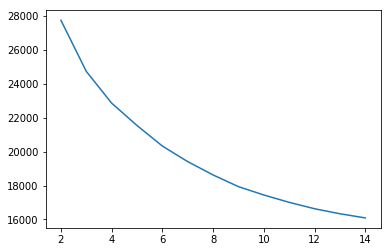

In [68]:
error=[]
for i in range(2,15):
    kmeans=KMeans(n_clusters=i).fit(X.values)
    error.append(kmeans.inertia_)
plt.plot(range(2,15),error)

In [73]:
kmeans=KMeans(n_clusters=7).fit(X)

In [74]:
print(kmeans.inertia_)

19465.953186256946


In [77]:
dbscan = DBSCAN(eps = .5, min_samples = 15).fit(X)

In [81]:
labels=dbscan.labels_

In [83]:
from sklearn import metrics
metrics.silhouette_score(X,labels)

-0.0668195409041406